In [6]:
import os.path
import re
from itertools import chain
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame


In [20]:
"""Load files into memory"""

# Baseline results
TEST_RESULT_FOLDER = Path("C:\\Users\\tizia\\PycharmProjects\\DDQN_Trading_MSC\\model_archive\\TestResults\\generalization")
GRAPH_OUTPUT = Path("./graphs/generalization")
name = "bmw_model"
corresponding_stock = "BMW"
OPTIMIZATION_TESTS = TEST_RESULT_FOLDER.joinpath(name)
METRICS_RELATIVE = "metrics.csv"



required_columns = ['model_name', 'stock', 'mode', 'return', 'total_volatility']

result_metrics = []
ref_bh = []
if os.path.exists(OPTIMIZATION_TESTS):
    test_directories = os.listdir(OPTIMIZATION_TESTS)
    print(f"Found {len(test_directories)} test folders:")
    print(test_directories)
    for i, test in enumerate(test_directories):
        test_path = OPTIMIZATION_TESTS.joinpath(test).joinpath(METRICS_RELATIVE)
        sample_df = pd.read_csv(test_path)
        
        ref_bh.append(sample_df.head(1))
        sample_df = sample_df.tail(2)
        sample_df['mode'] = sample_df['evaluation_mode'].apply(lambda x: "Eval" if x == True else "Train")
        sample_df['stock'] = sample_df['stock'].apply(lambda x: "BMW" if x == "Bayerische Motoren Werke AG" else x)
        sample_df = sample_df[required_columns]
        result_metrics.append(sample_df)

else:
    print(f"Folder: {OPTIMIZATION_TESTS} was not found. Nothing was loaded.")


metrics = pd.concat(result_metrics)
references = pd.concat(ref_bh)[['stock', 'return', 'total_volatility']].rename(columns={'return':'bh_return', 'total_volatility':'bh_volatility'})
references['stock'] = references['stock'].apply(lambda x: "BMW" if x == "Bayerische Motoren Werke AG" else x)
metrics_with_references = metrics.merge(references, on='stock')
metrics_with_references

Found 8 test folders:
['Apple', 'BMW', 'Deutsche Bank', 'DeutscheTelekom', 'Eon', 'Google', 'Henkel', 'Infineon']


,model_name,stock,mode,return,total_volatility,bh_return,bh_volatility
0,best_trained_on_bmw_d5,Apple,Train,0.543524,0.401039,1.485282,0.543576
1,best_trained_on_bmw_d5,Apple,Eval,0.779105,0.501327,1.485282,0.543576
2,best_trained_on_bmw_d5,BMW,Train,0.373678,0.537133,-0.103142,0.660994
3,best_trained_on_bmw_d5,BMW,Eval,0.207236,0.494920,-0.103142,0.660994
4,best_trained_on_bmw_d5,Deutsche Bank,Train,0.875982,0.685759,0.009197,0.927698
5,best_trained_on_bmw_d5,Deutsche Bank,Eval,1.022518,0.809288,0.009197,0.927698
6,best_trained_on_bmw_d5,Deutsche Telekom,Train,-0.184584,0.355436,0.315756,0.467299
7,best_trained_on_bmw_d5,Deutsche Telekom,Eval,-0.069246,0.400239,0.315756,0.467299
8,best_trained_on_bmw_d5,E.ON,Train,0.665175,0.381844,-0.043656,0.495900
9,best_trained_on_bmw_d5,E.ON,Eval,0.573031,0.411356,-0.043656,0.495900


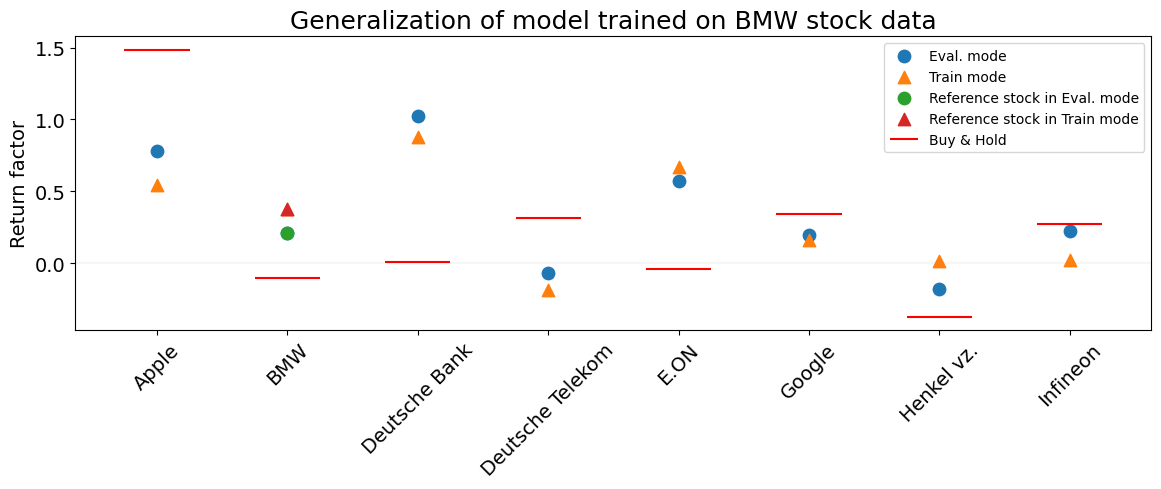

In [21]:
"""Make box plots and lines"""
#metrics = metrics[metrics['mode'] == 'Train']
TrainingStock = corresponding_stock

df = metrics_with_references
fig, ax = plt.subplots(figsize=(12, 5))
plt.axhline(y=0, color='lightgrey', alpha=0.2, zorder=-1)
plt.xticks(rotation=45)
markers = {'Eval': 'o', 'Train': '^'}
legends = {'Eval': 'Eval. mode', 'Train': 'Train mode'}
df_not_trained_on = df[~(df['stock'] == TrainingStock)]
for m, group in df.groupby('mode'):
    plt.scatter(x=group['stock'], y=group['return'], marker=markers[m], s=80, label=legends[m])
    #print(group)

legends_ref = {'Eval': 'Reference stock in Eval. mode', 'Train': 'Reference stock in Train mode'}
df_trained_on = df[df['stock'] == TrainingStock]
for m, group in df_trained_on.groupby('mode'):
    plt.scatter(x=group['stock'], y=group['return'], marker=markers[m], s=80, label=legends_ref[m])

hlines_df = df.groupby('stock').first().reset_index()
plt.hlines(y=hlines_df['bh_return'], xmin=hlines_df.index-0.25, xmax=hlines_df.index+0.25, linestyle='-', colors='red', label='Buy & Hold')

plt.legend()
plt.ylabel("Return factor", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title(f"Generalization of model trained on {corresponding_stock} stock data", fontsize=18)
plt.tight_layout()
plt.savefig(GRAPH_OUTPUT.joinpath(f"{name}_comp.png"))
plt.show()

plt.close()


